In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from Approximators import Bernstein, LinearizedBernstein
from Approximators.Polynomials import LegendrePolynomial, ChebyshevPolynomial

# Single Function

In [3]:
f = lambda x: np.sqrt(abs(x - 0.5))

In [4]:
n = 6
optimizer = Bernstein.CauchySimplex(n=n, m=n, verbose=True)

x = np.linspace(0, 1, 200)
y = f(x)

optimizer.fit(x, y);

4: L-2 2.194473e-01: L-inf 9.505643e-02


In [5]:
x_vals = np.linspace(0, 1, 1000)

legendre_diff = optimizer.denominator(x_vals) - optimizer.w_as_legendre_coef() @ LegendrePolynomial(n, x_vals)
np.max(abs(legendre_diff))

4.107825191113079e-15

In [6]:
chebyshev_diff = optimizer.denominator(x_vals) - optimizer.w_as_chebyshev_coef() @ ChebyshevPolynomial(n, x_vals)
np.max(abs(chebyshev_diff))

5.200700980978468e-15

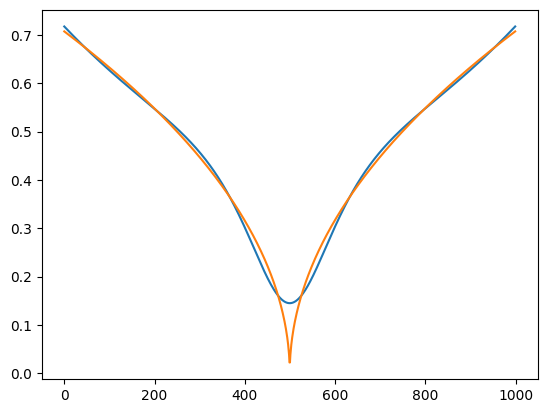

In [7]:
plt.plot(optimizer(x_vals))
plt.plot(f(x_vals))

# Multiple Functions

In [8]:
functions = [lambda x: abs(2 * (x - 0.5)), 
             lambda x: np.arctan(10 * (x - 0.5)),
             lambda x: (x - 0.8) ** 2]

In [9]:
n = 10
optimizer = Bernstein.CauchySimplex(n=n, m=n, verbose=True)

x = np.linspace(0, 1, 1000)
y = [f(x) for f in functions]

optimizer.fit(x, y);

22: L-2 (9.079625e-02, 7.103642e-02, 9.184692e-05): L-inf (2.140979e-02, 4.938007e-03, 1.528863e-05)


In [10]:
x_vals = np.linspace(0, 1, 1000)

legendre_diff = optimizer.denominator(x_vals) - optimizer.w_as_legendre_coef() @ LegendrePolynomial(n, x_vals)
np.max(abs(legendre_diff))

5.617728504603292e-14

In [11]:
chebyshev_diff = optimizer.denominator(x_vals) - optimizer.w_as_chebyshev_coef() @ ChebyshevPolynomial(n, x_vals)
np.max(abs(chebyshev_diff))

6.478151348687788e-14

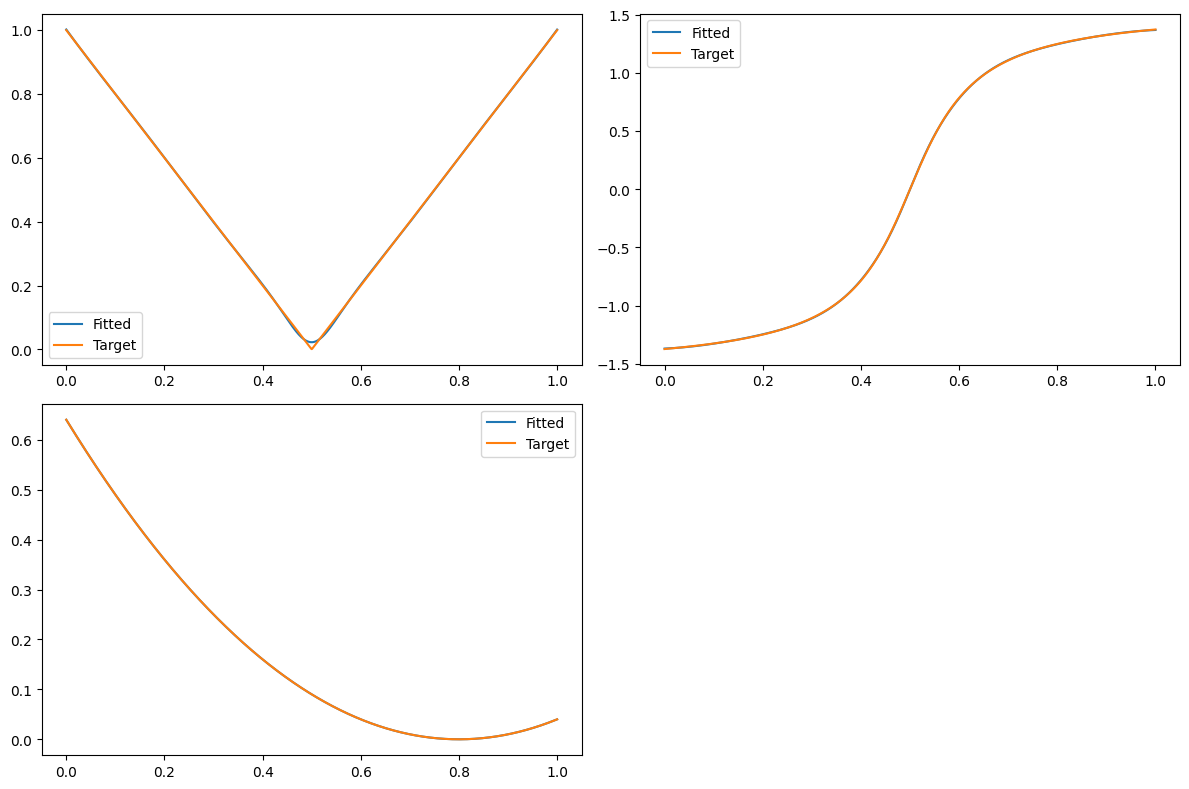

In [12]:
fitted_values = optimizer(x_vals)
target_values = [f(x_vals) for f in functions]

plt.figure(figsize=(12, 8))
i = 0
for fit, target in zip(fitted_values, target_values):
    plt.subplot(2, 2, i + 1)
    plt.plot(x_vals, fit, label='Fitted')
    plt.plot(x_vals, target, label='Target')
    
    i += 1
    
    plt.legend()
plt.tight_layout();

# Multivariate Rational Function

In [13]:
from Approximators.MultivariateBernstein import CauchySimplex as MultivariateBernstein

In [14]:
x_vals = np.linspace(0, 1, 101)
X, Y = np.meshgrid(x_vals, x_vals)
x = np.array([X.flatten(), Y.flatten()]).T

f = lambda x, y: np.sin(8 * (x - 0.5)) * np.sin(8 * (y - 0.5))
y = f(x[:, 0], x[:, 1])

In [15]:
n = 10
model = MultivariateBernstein([n, n], [n, n], verbose=True, max_iter=100, gamma=0.9)
model.fit(x, y)

40: L-2 6.183291e-05: L-inf 4.925517e-06


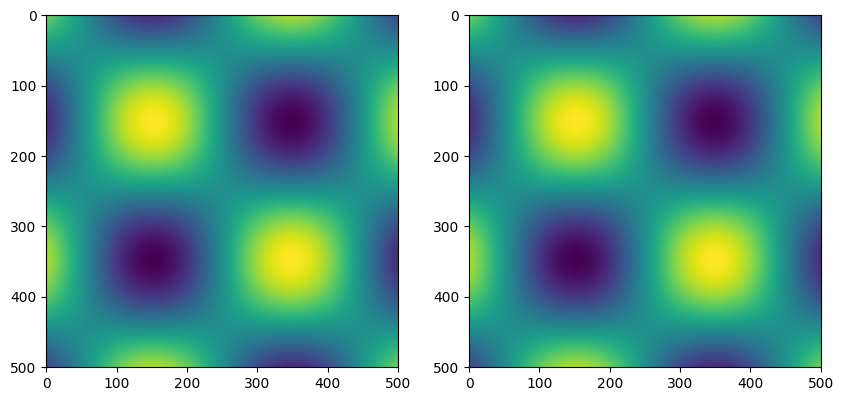

In [16]:
x_vals = np.linspace(0, 1, 501)
X, Y = np.meshgrid(x_vals, x_vals)
x_pred_vals = np.array([X.flatten(), Y.flatten()]).T

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(model(x_pred_vals).reshape(501, 501))

plt.subplot(1, 2, 2)
plt.imshow(f(x_pred_vals[:, 0], x_pred_vals[:, 1]).reshape(501, 501))

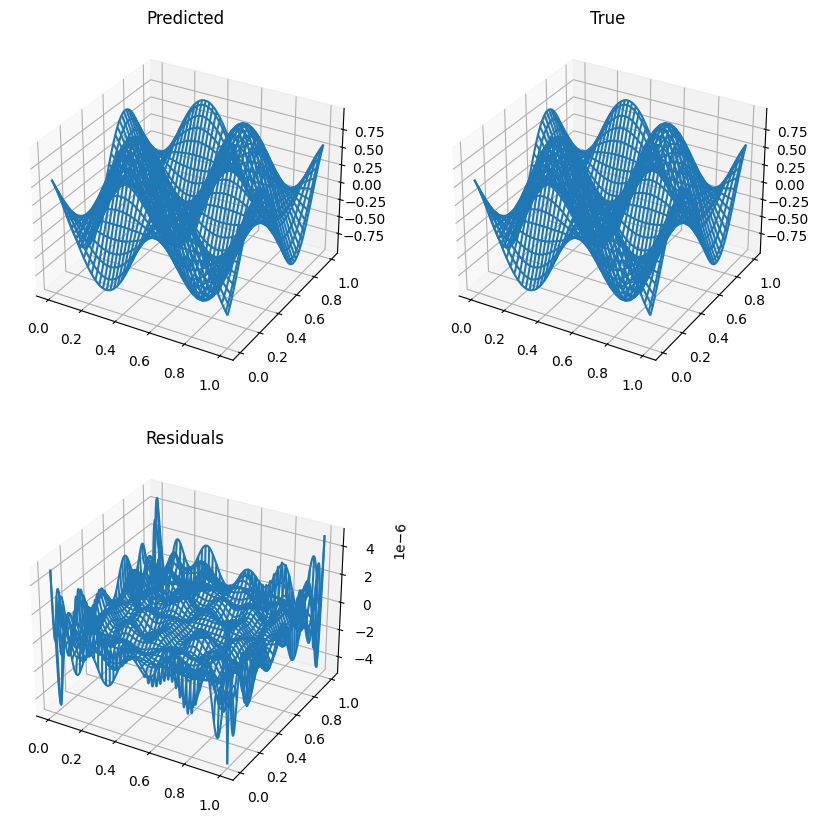

In [17]:
fig = plt.figure(figsize=(10, 10))

x_vals = np.linspace(0, 1, 501)
X, Y = np.meshgrid(x_vals, x_vals)
x_pred_vals = np.array([X.flatten(), Y.flatten()]).T

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_wireframe(X, Y, model(x_pred_vals).reshape(501, 501))
ax.set_title('Predicted')

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, f(x_pred_vals[:, 0], x_pred_vals[:, 1]).reshape(501, 501))
ax.set_title('True')

ax = fig.add_subplot(2, 2, 3, projection='3d')
residuals = f(x_pred_vals[:, 0], x_pred_vals[:, 1]) - model(x_pred_vals)
ax.plot_wireframe(X, Y, residuals.reshape(501, 501))
ax.set_title('Residuals')

plt.show()

### With Smoothing

In [18]:
x = np.random.rand(1000, 2)

f = lambda x, y: np.sin(8 * (x - 0.5)) * np.sin(8 * (y - 0.5))
y = f(x[:, 0], x[:, 1]) + np.random.normal(0, 0.1, len(x))

In [19]:
n = 8
model = MultivariateBernstein([n, n], [n, n], verbose=False, max_iter=100, gamma=0.9)
model.gridsearch(x, y, numerator_smoothing_penalty=[0.001, 0.01, 0.1, 1])

/Users/jameschok/git/RationalFunction/Approximators/MultivariateBernstein/CauchySimplex.py:247: ConvergenceWarning: Maximum number of iterations has been reached and convergence is not guaranteed. Try increasing `max_iter` or increasing `stopping_tol`.
  warnings.warn("Maximum number of iterations has been reached and convergence is not guaranteed. "


In [20]:
model.numerator_smoothing_penalty

0.01

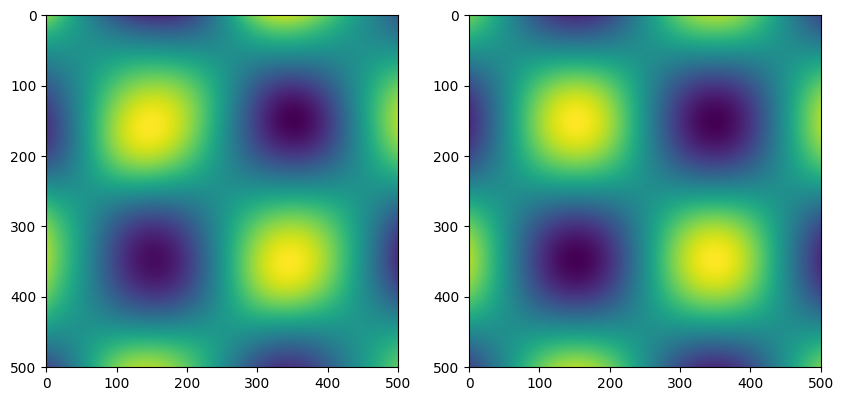

In [21]:
x_vals = np.linspace(0, 1, 501)
X, Y = np.meshgrid(x_vals, x_vals)
x_pred_vals = np.array([X.flatten(), Y.flatten()]).T

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(model(x_pred_vals).reshape(501, 501))

plt.subplot(1, 2, 2)
plt.imshow(f(x_pred_vals[:, 0], x_pred_vals[:, 1]).reshape(501, 501))

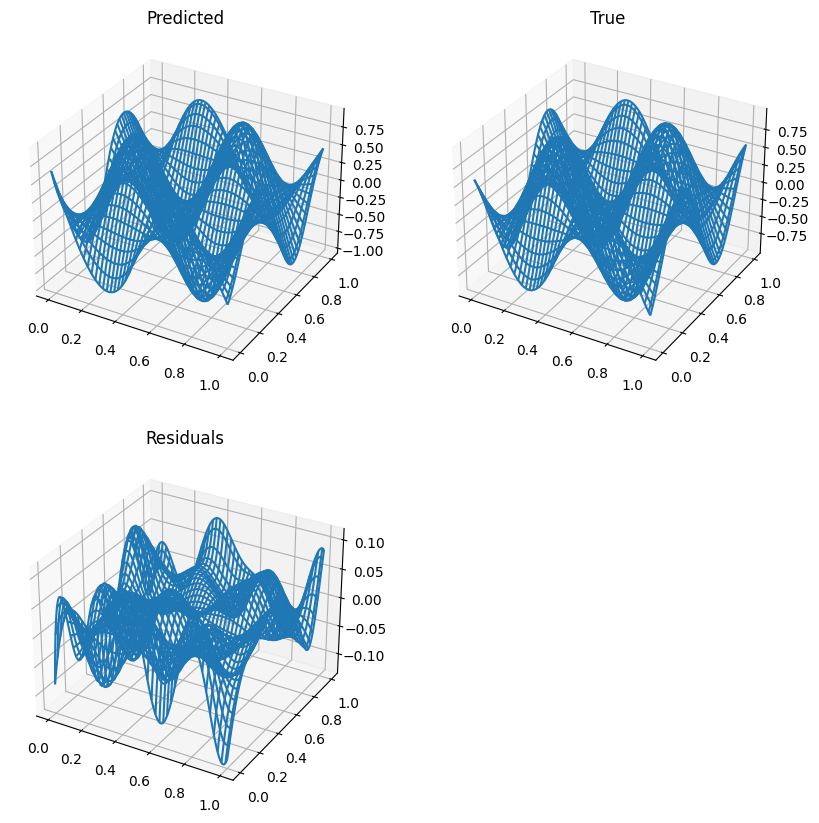

In [22]:
fig = plt.figure(figsize=(10, 10))

x_vals = np.linspace(0, 1, 501)
X, Y = np.meshgrid(x_vals, x_vals)
x_pred_vals = np.array([X.flatten(), Y.flatten()]).T

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_wireframe(X, Y, model(x_pred_vals).reshape(501, 501))
ax.set_title('Predicted')

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, f(x_pred_vals[:, 0], x_pred_vals[:, 1]).reshape(501, 501))
ax.set_title('True')

ax = fig.add_subplot(2, 2, 3, projection='3d')
residuals = f(x_pred_vals[:, 0], x_pred_vals[:, 1]) - model(x_pred_vals)
ax.plot_wireframe(X, Y, residuals.reshape(501, 501))
ax.set_title('Residuals')

plt.show()